In [101]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
import plotly.express as px

# #IMPORT 5 ALGORITHMS FROM SKLEARN
# %matplotlib inline
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.linear_model import LassoCV

# #INSTANTIATE 5 ALGORITHMS/ESTIMATORS
# rf = RandomForestRegressor()
# dt = DecisionTreeRegressor()
# etr = ExtraTreesRegressor()
# ada = AdaBoostRegressor()
# lso = LassoCV()

In [102]:
df = pd.read_csv(r'C:\thesis\datasets_clf.csv')
df2 = pd.read_csv(r'C:\thesis\datasets_clf.csv')
df

,student_id,age,sex,course,yr_level,socioeconomic_stat,fam_support,working_stud,scholar,personality_type,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
0,2021-01592,19.0,F,CD,2,low,yes,no,yes,ISTJ,...,never,always,always,sometimes,always,always,sometimes,sometimes,1.5588,Superior
1,2021-02910,19.0,F,CD,2,lower middle,yes,no,no,ESFJ,...,sometimes,sometimes,sometimes,sometimes,sometimes,sometimes,sometimes,sometimes,1.3824,Superior
2,2021-02862,19.0,F,CD,2,low,yes,no,no,ENTP,...,always,never,always,sometimes,sometimes,always,sometimes,sometimes,1.5882,Superior
3,2021-02890,19.0,F,CD,2,lower middle,yes,yes,no,ESFJ,...,always,sometimes,never,sometimes,sometimes,sometimes,always,sometimes,1.5000,Superior
4,2020-04136,20.0,F,CD,2,low,yes,no,no,ISFJ,...,sometimes,never,sometimes,sometimes,never,sometimes,sometimes,always,1.4347,Superior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-00476,21.0,F,SW,2,lower middle,yes,no,no,ISFP,...,always,sometimes,never,never,Sometimes,sometimes,sometimes,never,1.9559,Very-Satisfactory
353,2021-01868,20.0,F,SW,2,low,yes,yes,no,ISFP,...,always,never,sometimes,sometimes,Sometimes,always,sometimes,never,1.5294,Superior
354,2021-01891,19.0,F,SW,2,low,yes,no,no,ENFJ,...,always,never,always,never,always,sometimes,sometimes,sometimes,1.7647,Very-Satisfactory
355,2021-01897,19.0,F,SW,2,low,yes,no,no,ISFP,...,always,always,sometimes,never,always,always,sometimes,never,1.4853,Superior


# DATA EXPLORATION

In [103]:
#Dimension of the raw dataframe
print("Dimension of the data raw dataframe Rows by Columns, ", df.shape)

Dimension of the data raw dataframe Rows by Columns,  (357, 51)


In [104]:
#check Dataframe with null values
df2.isna().sum()

student_id             0
age                   11
sex                    6
course                 0
yr_level               0
socioeconomic_stat     0
fam_support            0
working_stud           0
scholar                0
personality_type       0
TM1                    0
TM2                    0
TM3                    0
TM4                    0
TM5                    0
TM6                    0
TM7                    0
CAP1                   0
CAP2                   0
CAP3                   1
CAP4                   0
GSS1                   0
GSS2                   0
GSS3                   0
GSS4                   0
GSS5                   0
GSS6                   0
GSS7                   0
EP1                    0
EP2                    0
EP3                    0
EP4                    0
EP5                    0
EP6                    0
NT1                    0
NT2                    0
NT3                    0
desktop                0
laptop                 0
mobile_phone           0


In [105]:
df.describe()

,age,yr_level,GPA
count,346.000000,357.000000,357.000000
mean,20.462428,2.851541,1.918353
std,1.520880,0.740353,0.446958
min,10.000000,2.000000,1.197900
25%,20.000000,2.000000,1.586500
50%,20.000000,3.000000,1.855800
75%,21.000000,3.000000,2.148700
max,29.000000,4.000000,4.368400


# DATA CLEANING

In [106]:
#Check Sex consistency
print("Sex Attributes :" ,df2.sex.unique())
print("""  Justification  There are 4 attribute exsting inside Sex. We should replace the values with 
                             precise input for consistency.""""" )

#checking missing value for sex
print("\nNumber of missing values of Sex","[" ,df2.sex.isna().sum(), "]")

#Replace Sex value with a precise value 'S' and 'M' and Fill values
df["sex"].replace("M ", "M", inplace = True)
df["sex"].replace("F ", "F", inplace = True)
df["sex"].fillna(method="ffill", inplace=True)

#Check uniqueness of Sex
print("\nUpdated Attributes inside Sex : " ,df["sex"].unique())

print("\nNumber of missing values of Sex","[" ,df.sex.isna().sum(), "]")

#Values of each attribute for Sex
valueCounts_MaleFemale = df.sex.value_counts()
valueCounts_MaleFemale


Sex Attributes : ['F' 'M' nan 'M ' 'F ']
  Justification  There are 4 attribute exsting inside Sex. We should replace the values with 
                             precise input for consistency.

Number of missing values of Sex [ 6 ]

Updated Attributes inside Sex :  ['F' 'M']

Number of missing values of Sex [ 0 ]


F    198
M    159
Name: sex, dtype: int64

In [107]:
#Check uniqueness for age
Age_Unique = df.age.sort_values().unique()
Age_Unique

array([10., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       nan])

In [108]:
#Check for missing values for age
AgeMissing = df2["age"].isna().sum()
print("\nNumber of missing value of age : ", AgeMissing, " missing")

#Filling missing values for age with mean.
df.age.fillna(df["age"].mean(), inplace = True)

#Check for missing values for age
print("\nNumber of missing value of age : ", df["age"].isna().sum(), " missing")


Number of missing value of age :  11  missing

Number of missing value of age :  0  missing


In [109]:
#fill missing values for CAP3
df["CAP3"].fillna(method="ffill", inplace = True)
print("\nNumber of missing value of CAP3 : ", df["CAP3"].isna().sum())


Number of missing value of CAP3 :  0


In [110]:
print("Dataframe has no missing value")
df.isna().sum()

Dataframe has no missing value


student_id            0
age                   0
sex                   0
course                0
yr_level              0
socioeconomic_stat    0
fam_support           0
working_stud          0
scholar               0
personality_type      0
TM1                   0
TM2                   0
TM3                   0
TM4                   0
TM5                   0
TM6                   0
TM7                   0
CAP1                  0
CAP2                  0
CAP3                  0
CAP4                  0
GSS1                  0
GSS2                  0
GSS3                  0
GSS4                  0
GSS5                  0
GSS6                  0
GSS7                  0
EP1                   0
EP2                   0
EP3                   0
EP4                   0
EP5                   0
EP6                   0
NT1                   0
NT2                   0
NT3                   0
desktop               0
laptop                0
mobile_phone          0
tablet                0
wifi            

In [111]:
df.socioeconomic_stat.unique()

array(['low', 'lower middle', 'middle', 'upper middle', 'low ',
       'Upper but not rich', 'rich', 'lower'], dtype=object)

# RECONSTRUCTING VALUES INSIDE COLUMNS

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          357 non-null    object 
 1   age                 357 non-null    float64
 2   sex                 357 non-null    object 
 3   course              357 non-null    object 
 4   yr_level            357 non-null    int64  
 5   socioeconomic_stat  357 non-null    object 
 6   fam_support         357 non-null    object 
 7   working_stud        357 non-null    object 
 8   scholar             357 non-null    object 
 9   personality_type    357 non-null    object 
 10  TM1                 357 non-null    object 
 11  TM2                 357 non-null    object 
 12  TM3                 357 non-null    object 
 13  TM4                 357 non-null    object 
 14  TM5                 357 non-null    object 
 15  TM6                 357 non-null    object 
 16  TM7     

In [113]:
#PRINT UNIQUENESS 
print(" Unique of age : ", df2["age"].unique(), "\n")
print(" Unique of sex : ", df2["sex"].unique(), "\n")
print(" Unique of course : ", df2["course"].unique(), "\n")
print(" Unique of yr_level: ", df2["yr_level"].unique(), "\n")
print(" Unique of socioeconomic_stat : ", df2["socioeconomic_stat"].unique(), "\n")
print(" Unique of fam_support : ", df2["fam_support"].unique(), "\n")
print(" Unique of working_stud : ", df2["working_stud"].unique(), "\n")
print(" Unique of scholar : ", df2["scholar"].unique(), "\n")
print(" Unique of personality_type : ", df2["personality_type"].unique(), "\n")
print(" Unique of TM1 : ", df2["TM1"].unique(), "\n")
print(" Unique of TM2 : ", df2["TM2"].unique(), "\n")
print(" Unique of TM3 : ", df2["TM3"].unique(), "\n")
print(" Unique of TM4 : ", df2["TM4"].unique(), "\n")
print(" Unique of TM5 : ", df2["TM5"].unique(), "\n")
print(" Unique of TM6 : ", df2["TM6"].unique(), "\n")
print(" Unique of TM7 : ", df2["TM7"].unique(), "\n")
print(" Unique of CAP1 : ", df2["CAP1"].unique(), "\n")
print(" Unique of CAP2 : ", df2["CAP2"].unique(), "\n")
print(" Unique of CAP3 : ", df2["CAP3"].unique(), "\n")
print(" Unique of CAP4 : ", df2["CAP4"].unique(), "\n")
print(" Unique of GSS1 : ", df2["GSS1"].unique(), "\n")
print(" Unique of GSS2 : ", df2["GSS2"].unique(), "\n")
print(" Unique of GSS3 : ", df2["GSS3"].unique(), "\n")
print(" Unique of GSS4 : ", df2["GSS4"].unique(), "\n")
print(" Unique of GSS5 : ", df2["GSS5"].unique(), "\n")
print(" Unique of GSS6 : ", df2["GSS6"].unique(), "\n")
print(" Unique of GSS7 : ", df2["GSS7"].unique(), "\n")
print(" Unique of EP1 : ", df2["EP1"].unique(), "\n")
print(" Unique of EP2 : ", df2["EP2"].unique(), "\n")
print(" Unique of EP3 : ", df2["EP3"].unique(), "\n")
print(" Unique of EP4 : ", df2["EP4"].unique(), "\n")
print(" Unique of EP5 : ", df2["EP5"].unique(), "\n")
print(" Unique of EP6 : ", df2["EP6"].unique(), "\n")
print(" Unique of NT1 : ", df2["NT1"].unique(), "\n")
print(" Unique of NT2 : ", df2["NT2"].unique(), "\n")
print(" Unique of NT3 : ", df2["NT3"].unique(), "\n")
print(" Unique of desktop : ", df2["desktop"].unique(), "\n")
print(" Unique of laptop : ", df2["laptop"].unique(), "\n")
print(" Unique of mobile_phone : ", df2["mobile_phone"].unique(), "\n")
print(" Unique of tablet : ", df2["tablet"].unique(), "\n")
print(" Unique of wifi : ", df2["wifi"].unique(), "\n")
print(" Unique of prepaid-wifi : ", df2["prepaid-wifi"].unique(), "\n")
print(" Unique of cellular_data : ", df2["cellular_data"].unique(), "\n")
print(" Unique of hotspot : ", df2["hotspot"].unique(), "\n")
print(" Unique of vhigh_speed : ", df2["vhigh_speed"].unique(), "\n")
print(" Unique of high_speed : ", df2["high_speed"].unique(), "\n")
print(" Unique of moderate_speed : ", df2["moderate_speed"].unique(), "\n")
print(" Unique of light_speed : ", df2["light_speed"].unique(), "\n")


 Unique of age :  [19. 20. 21. 25. 18. nan 22. 27. 24. 23. 29. 28. 10. 26.] 

 Unique of sex :  ['F' 'M' nan 'M ' 'F '] 

 Unique of course :  ['CD' 'IT' 'CS' 'SW'] 

 Unique of yr_level:  [2 3 4] 

 Unique of socioeconomic_stat :  ['low' 'lower middle' 'middle' 'upper middle' 'low ' 'Upper but not rich'
 'rich' 'lower'] 

 Unique of fam_support :  ['yes' 'no'] 

 Unique of working_stud :  ['no' 'yes'] 

 Unique of scholar :  ['yes' 'no'] 

 Unique of personality_type :  ['ISTJ' 'ESFJ' 'ENTP' 'ISFJ' 'ENFJ' 'INFJ' 'ISFP' 'INTJ' 'ENTJ' 'ESTP'
 'INFP' 'ESFP' 'ESTJ' 'ENFP' 'ISTP' 'INTP'] 

 Unique of TM1 :  ['always' 'sometimes' 'never' 'sometime' 'Sometimes' 'sometimesom'
 'sometiems'] 

 Unique of TM2 :  ['sometimes' 'never' 'always'] 

 Unique of TM3 :  ['sometimes' 'always' 'never'] 

 Unique of TM4 :  ['always' 'sometimes' 'never'] 

 Unique of TM5 :  ['always' 'sometimes' 'never'] 

 Unique of TM6 :  ['always' 'sometimes' 'never' 'sometime' 'sometimess' 'someyimes'] 

 Unique of TM7 

       JUSTIFICATION :
           Columns that REQUIRES replacing unwanted values;
              TM1 -> ['always' 'sometimes' 'never' 'sometime' 'Sometimes' 'sometimesom' 'sometiems'] 
              TM6 ->  ['always' 'sometimes' 'never' 'sometime' 'sometimess' 'someyimes']
              CAP1 -> ['always' 'sometimes' 'Always' 'never'] 
              CAP2 -> ['always' 'sometimes' 'Sometimes' 'never' 'sometimesnever' 's'] 
              GSS5 -> ['always' 'sometimes' 'Sometimes' 'never' 'sometimes ' 'sometime'] 
              tablet -> ['never' 'sometimes' 'an' 'always']
              prepaid-wifi -> ['always' 'sometimes' 'never' 'Sometimes'] 
              vhigh_speed -> ['always' 'sometimes' 'never' 'Sometimes'] 
              high_speed -> ['always' 'sometimes' 'never' 'high'] 
              moderate_speed -> ['sometimes' 'always' 'never' 'moderate'] 
                
       **THE FF. INPUTS WAS NOT CONSISTENT**    

In [114]:
#Replacing unwanted values
df.replace({
            'socioeconomic_stat' : {'low ':'low', 'lower':'low'},
            'TM1' : {'sometime':'sometimes',
                     'Sometimes':'sometimes',
                     'sometimesom':'sometimes',
                     'sometiems':'sometimes'
                    },
            'TM6' : {'sometime':'sometimes',
                     'sometimess':'sometimes',
                     'someyimes':'sometimes'
                    },
            'CAP1' : {'Always':'always'},
            'CAP2' : {'Sometimes':'sometimes',
                      'sometimesnever':'sometimes',
                      's':'sometimes'
                     },
            'GSS5' : {'Sometimes':'sometimes',
                      'sometimes ':'sometimes', 
                      'sometime':'sometimes'},
            'tablet' : {'an':'always'},
            'prepaid-wifi' : {'Sometimes':'sometimes'},
            'vhigh_speed' : {'Sometimes':'sometimes'},
            'high_speed' : {'high':'always'},
            'moderate_speed' : {'moderate':'sometimes'}
           }, inplace=True)

In [115]:
print("Updated Uniqueness of socioeconomic_stat : ", df["socioeconomic_stat"].unique(), "\n")
print("Updated Uniqueness of TM1 : ", df["TM1"].unique(),"\n")
print("Updated Uniqueness of TM6 : ", df["TM6"].unique(),"\n")
print("Updated Uniqueness of CAP1 : ", df["CAP1"].unique(),"\n")
print("Updated Uniqueness of CAP2 : ", df["CAP2"].unique(),"\n")
print("Updated Uniqueness of GSS5 : ", df["GSS5"].unique(),"\n")
print("Updated Uniqueness of prepaid-wifi : ", df["prepaid-wifi"].unique(),"\n")
print("Updated Uniqueness of vhigh_speed : ", df["vhigh_speed"].unique(),"\n")
print("Updated Uniqueness of high_speed : ", df["high_speed"].unique(),"\n")
print("Updated Uniqueness of moderate_speed : ", df["moderate_speed"].unique(),"\n")

Updated Uniqueness of socioeconomic_stat :  ['low' 'lower middle' 'middle' 'upper middle' 'Upper but not rich' 'rich'] 

Updated Uniqueness of TM1 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of TM6 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of CAP1 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of CAP2 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of GSS5 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of prepaid-wifi :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of vhigh_speed :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of high_speed :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of moderate_speed :  ['sometimes' 'always' 'never'] 



In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          357 non-null    object 
 1   age                 357 non-null    float64
 2   sex                 357 non-null    object 
 3   course              357 non-null    object 
 4   yr_level            357 non-null    int64  
 5   socioeconomic_stat  357 non-null    object 
 6   fam_support         357 non-null    object 
 7   working_stud        357 non-null    object 
 8   scholar             357 non-null    object 
 9   personality_type    357 non-null    object 
 10  TM1                 357 non-null    object 
 11  TM2                 357 non-null    object 
 12  TM3                 357 non-null    object 
 13  TM4                 357 non-null    object 
 14  TM5                 357 non-null    object 
 15  TM6                 357 non-null    object 
 16  TM7     

# TRANSFORMING DATA

In [117]:
from category_encoders import OrdinalEncoder
Select_StudInfo_MBTIFeatures = df.iloc[:, [0,1,2,3,4,5,9]]
maplist = [{'col' : 'socioeconomic_stat', 'mapping' : {'low' : 1 ,'lower middle' : 2 ,'middle' : 3, 'upper middle': 4, 'Upper but not rich' : 5,  'rich' :6}},
           {'col' : 'sex' , 'mapping' : { 'F' : 0 , 'M' : 1}},
           {'col' : 'course' , 'mapping' : { 'CD':1, 'IT':2, 'CS':3 , 'SW':4}},
           {'col' : 'personality_type' , 'mapping' : {'ISTJ':0, 'ESFJ':1, 'ENTP':2, 'ISFJ':3, 'ENFJ':4, 'INFJ':5, 'ISFP':6, 'INTJ':7,
       'ENTJ':8, 'ESTP':9, 'INFP':10, 'ESFP':11, 'ESTJ':12, 'ENFP':13, 'ISTP':14, 'INTP':15}}]
oeStudentInfo = OrdinalEncoder(mapping=maplist)
StudInfo_DF = oeStudentInfo.fit_transform(Select_StudInfo_MBTIFeatures)

In [118]:
Select_demographicFeatures = df.iloc[:, [6, 7, 8]]
maplist = [{'col' : 'fam_support', 
                    'mapping' : {'yes' : 1, 'no' : 0}},
           {'col' : 'scholar',
                    'mapping' : {'yes' : 1, 'no' : 0}},
           {'col' : 'working_stud', 
                    'mapping' : {'yes' : 1, 'no' : 0}}]
oeDic = OrdinalEncoder(mapping=maplist)
DiFeatures_DF = oeDic.fit_transform(Select_demographicFeatures)

In [119]:
Select_Tri_ValFeatures = df.iloc[:, 10 : 51]
maplist = [{'col' : 'TM1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM7', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS7', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'desktop', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'laptop', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'mobile_phone', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'tablet', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'wifi', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'prepaid-wifi', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'cellular_data', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'hotspot', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'vhigh_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'high_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'moderate_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'light_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}}]

oeTri = OrdinalEncoder(mapping=maplist)
TriFeatures_DF = oeTri.fit_transform(Select_Tri_ValFeatures)

# DATAFRAME CONCATINATION

In [120]:
newDF =  pd.concat([StudInfo_DF, DiFeatures_DF,TriFeatures_DF], axis=1)
newDF

,student_id,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
0,2021-01592,19.0,0,1,2,1,0,1,0,1,...,3,1,1,2,1,1,2,2,1.5588,Superior
1,2021-02910,19.0,0,1,2,2,1,1,0,0,...,2,2,2,2,2,2,2,2,1.3824,Superior
2,2021-02862,19.0,0,1,2,1,2,1,0,0,...,1,3,1,2,2,1,2,2,1.5882,Superior
3,2021-02890,19.0,0,1,2,2,1,1,1,0,...,1,2,3,2,2,2,1,2,1.5000,Superior
4,2020-04136,20.0,0,1,2,1,3,1,0,0,...,2,3,2,2,3,2,2,1,1.4347,Superior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-00476,21.0,0,4,2,2,6,1,0,0,...,1,2,3,3,2,2,2,3,1.9559,Very-Satisfactory
353,2021-01868,20.0,0,4,2,1,6,1,1,0,...,1,3,2,2,2,1,2,3,1.5294,Superior
354,2021-01891,19.0,0,4,2,1,4,1,0,0,...,1,3,1,3,1,2,2,2,1.7647,Very-Satisfactory
355,2021-01897,19.0,0,4,2,1,6,1,0,0,...,1,1,2,3,1,1,2,3,1.4853,Superior


In [121]:
newDF.sex.unique()

array([0, 1])

In [122]:
newDF.age.unique()

array([19.        , 20.        , 21.        , 25.        , 18.        ,
       20.46242775, 22.        , 27.        , 24.        , 23.        ,
       29.        , 28.        , 10.        , 26.        ])

In [123]:
newDF.personality_type.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [124]:
newDF

,student_id,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
0,2021-01592,19.0,0,1,2,1,0,1,0,1,...,3,1,1,2,1,1,2,2,1.5588,Superior
1,2021-02910,19.0,0,1,2,2,1,1,0,0,...,2,2,2,2,2,2,2,2,1.3824,Superior
2,2021-02862,19.0,0,1,2,1,2,1,0,0,...,1,3,1,2,2,1,2,2,1.5882,Superior
3,2021-02890,19.0,0,1,2,2,1,1,1,0,...,1,2,3,2,2,2,1,2,1.5000,Superior
4,2020-04136,20.0,0,1,2,1,3,1,0,0,...,2,3,2,2,3,2,2,1,1.4347,Superior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-00476,21.0,0,4,2,2,6,1,0,0,...,1,2,3,3,2,2,2,3,1.9559,Very-Satisfactory
353,2021-01868,20.0,0,4,2,1,6,1,1,0,...,1,3,2,2,2,1,2,3,1.5294,Superior
354,2021-01891,19.0,0,4,2,1,4,1,0,0,...,1,3,1,3,1,2,2,2,1.7647,Very-Satisfactory
355,2021-01897,19.0,0,4,2,1,6,1,0,0,...,1,1,2,3,1,1,2,3,1.4853,Superior


In [125]:
newDF.yr_level.unique()

array([2, 3, 4], dtype=int64)

In [126]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [127]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          357 non-null    object 
 1   age                 357 non-null    float64
 2   sex                 357 non-null    int32  
 3   course              357 non-null    int32  
 4   yr_level            357 non-null    int64  
 5   socioeconomic_stat  357 non-null    int32  
 6   personality_type    357 non-null    int32  
 7   fam_support         357 non-null    int32  
 8   working_stud        357 non-null    int32  
 9   scholar             357 non-null    int32  
 10  TM1                 357 non-null    int32  
 11  TM2                 357 non-null    int32  
 12  TM3                 357 non-null    int32  
 13  TM4                 357 non-null    int32  
 14  TM5                 357 non-null    int32  
 15  TM6                 357 non-null    int32  
 16  TM7     

# DESCRIPTIVE VISUALIZATION

<AxesSubplot:title={'center':'Age Distribution'}>

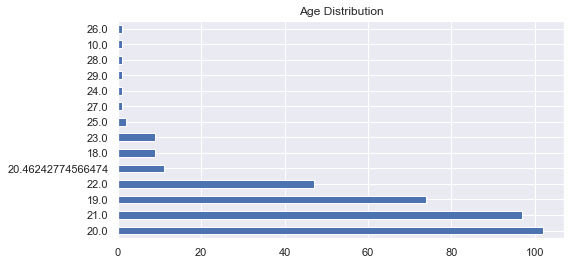

In [128]:
#count 'sex' column ing pie chart
newDF["age"].value_counts()[:].plot(kind='barh', title='Age Distribution', figsize=(8,4))

<AxesSubplot:xlabel='sex,fam_support'>

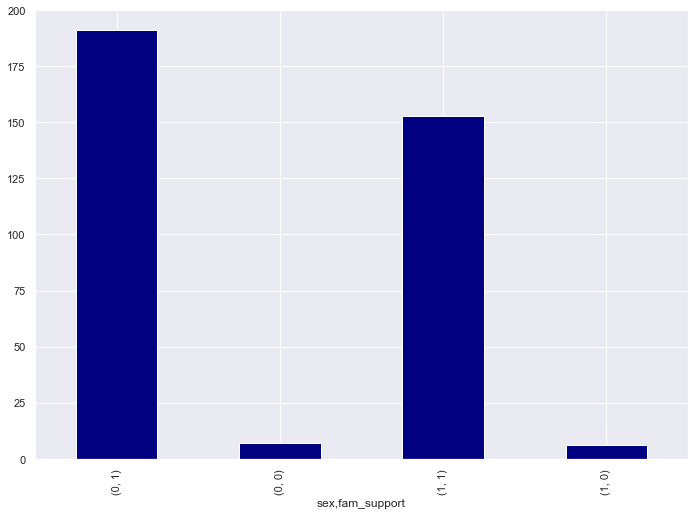

In [129]:
#Count of each sex with family_support
PersonalityPopu = newDF.groupby('sex')[["fam_support"]].value_counts()
PersonalityPopu.plot(kind='bar', colormap='jet')

In [130]:
DiFeatures_DF.corr()

,fam_support,working_stud,scholar
fam_support,1.000000,-0.305185,-0.023546
working_stud,-0.305185,1.000000,0.077603
scholar,-0.023546,0.077603,1.000000


In [131]:
StudInfo_DF.corr()

,age,sex,course,yr_level,socioeconomic_stat,personality_type
age,1.000000,-0.008345,0.073705,0.458607,0.044174,0.032515
sex,-0.008345,1.000000,0.095132,-0.025881,0.096737,0.073796
course,0.073705,0.095132,1.000000,0.042690,0.033566,0.111371
yr_level,0.458607,-0.025881,0.042690,1.000000,0.065533,-0.005072
socioeconomic_stat,0.044174,0.096737,0.033566,0.065533,1.000000,0.056496
personality_type,0.032515,0.073796,0.111371,-0.005072,0.056496,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'course'}>,
        <AxesSubplot:title={'center':'yr_level'}>,
        <AxesSubplot:title={'center':'socioeconomic_stat'}>,
        <AxesSubplot:title={'center':'personality_type'}>,
        <AxesSubplot:title={'center':'fam_support'}>],
       [<AxesSubplot:title={'center':'working_stud'}>,
        <AxesSubplot:title={'center':'scholar'}>,
        <AxesSubplot:title={'center':'TM1'}>,
        <AxesSubplot:title={'center':'TM2'}>,
        <AxesSubplot:title={'center':'TM3'}>,
        <AxesSubplot:title={'center':'TM4'}>,
        <AxesSubplot:title={'center':'TM5'}>],
       [<AxesSubplot:title={'center':'TM6'}>,
        <AxesSubplot:title={'center':'TM7'}>,
        <AxesSubplot:title={'center':'CAP1'}>,
        <AxesSubplot:title={'center':'CAP2'}>,
        <AxesSubplot:title={'center':'CAP3'}>,
        <AxesSubplot:title={'center':'CAP4'}>,
        <AxesSubp

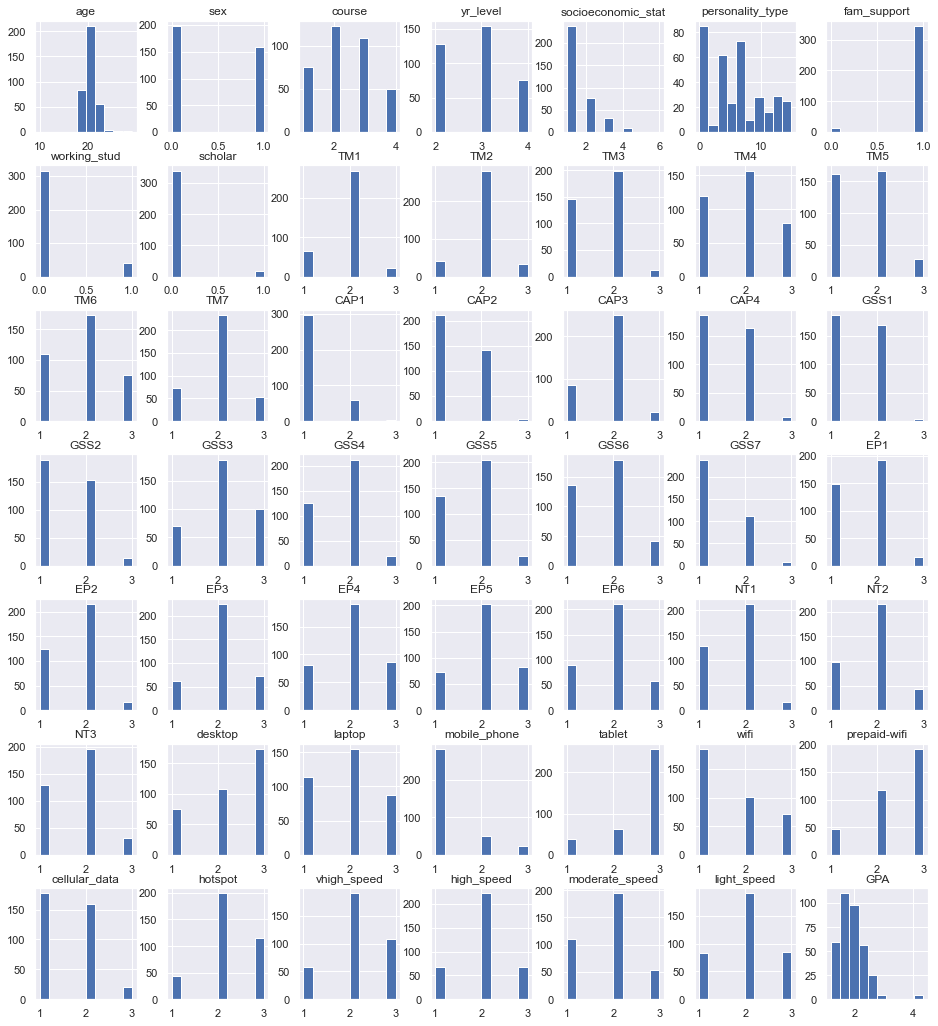

In [132]:
newDF.hist(grid=True,  figsize = (16,18))

### Dropping columns 

In [133]:
newDF.drop(columns = 'student_id', inplace=True)

In [134]:
newDF.head(10)

,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,TM1,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
0,19.0,0,1,2,1,0,1,0,1,1,...,3,1,1,2,1,1,2,2,1.5588,Superior
1,19.0,0,1,2,2,1,1,0,0,2,...,2,2,2,2,2,2,2,2,1.3824,Superior
2,19.0,0,1,2,1,2,1,0,0,2,...,1,3,1,2,2,1,2,2,1.5882,Superior
3,19.0,0,1,2,2,1,1,1,0,2,...,1,2,3,2,2,2,1,2,1.5000,Superior
4,20.0,0,1,2,1,3,1,0,0,1,...,2,3,2,2,3,2,2,1,1.4347,Superior
5,21.0,0,1,2,1,4,1,0,0,2,...,1,3,1,3,2,2,2,1,2.2500,Satisfactory
6,19.0,0,1,2,1,0,1,0,0,2,...,2,3,2,3,3,3,2,3,1.5000,Superior
7,21.0,0,1,2,1,5,0,1,0,2,...,1,2,2,2,2,2,2,2,1.5294,Superior
8,19.0,0,1,2,1,6,1,0,0,1,...,2,2,2,2,2,2,2,2,1.7206,Superior
9,19.0,0,1,2,1,3,1,0,0,2,...,3,3,1,3,3,3,2,1,1.5000,Superior


## EDA HERE!

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          357 non-null    object 
 1   age                 357 non-null    float64
 2   sex                 357 non-null    object 
 3   course              357 non-null    object 
 4   yr_level            357 non-null    int64  
 5   socioeconomic_stat  357 non-null    object 
 6   fam_support         357 non-null    object 
 7   working_stud        357 non-null    object 
 8   scholar             357 non-null    object 
 9   personality_type    357 non-null    object 
 10  TM1                 357 non-null    object 
 11  TM2                 357 non-null    object 
 12  TM3                 357 non-null    object 
 13  TM4                 357 non-null    object 
 14  TM5                 357 non-null    object 
 15  TM6                 357 non-null    object 
 16  TM7     

In [136]:
PT_DFdummy = newDF.iloc[:, 5]
SH_DF = df.iloc[:,10:37] #locate study habits

SH_DFdummy = pd.get_dummies(SH_DF)

PT_SH_df= pd.concat([PT_DFdummy, SH_DFdummy], axis=1)

<AxesSubplot:xlabel='personality_type,gpa_range'>

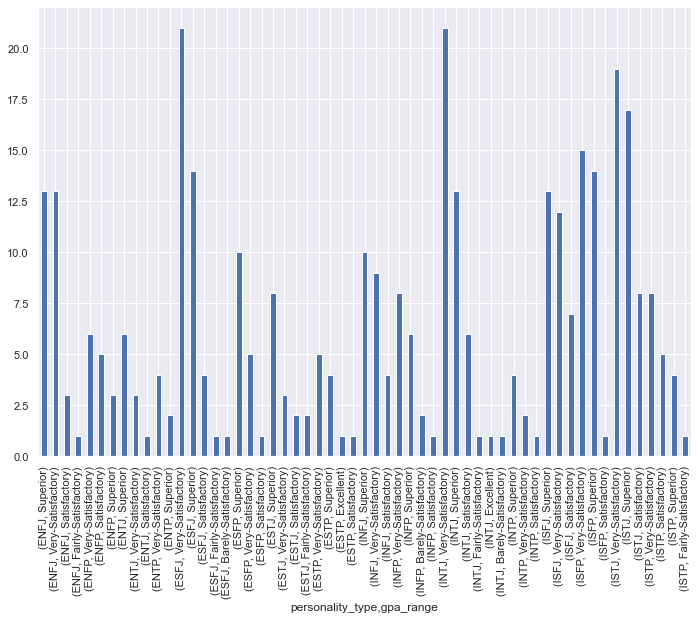

In [137]:
plot_personality = df.groupby("personality_type")[["gpa_range"]].value_counts(ascending = False)
plot_personality.plot(kind="bar", stacked=True)

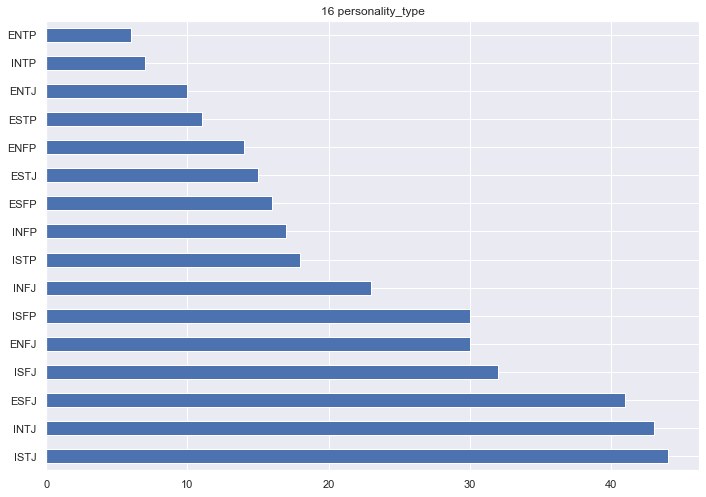

In [138]:
pt_count = df.personality_type.value_counts().plot(kind="barh", title='16 personality_type')

Text(0.5, 0, 'Count')

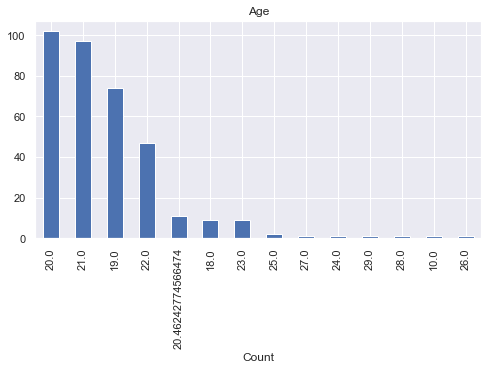

In [139]:
#count 'sex' column ing pie chart
newDF["age"].value_counts()[:].plot(kind='bar', title='Age', figsize=(8,4)).set_xlabel("Count")

In [140]:
#Count of each sex with family_support
import plotly.express as px

PersonalityPopu = df.groupby('scholar')[["fam_support"]].value_counts()
#PersonalityPopu.plot(kind='pie', colormap='jet')

names = ["FEMALE, Yes", "FEMALE, No", "MALE, Yes", "MALE, No"]
fig = px.pie(df, values=PersonalityPopu, names=names, title="COUNT MALE & FEMALE WITH FAMILI")
fig.show()

<AxesSubplot:xlabel='course', ylabel='count'>

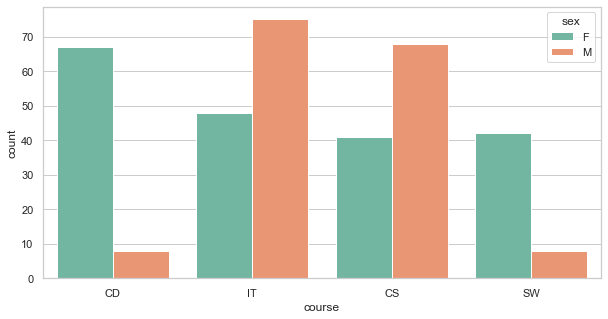

In [141]:
sns.set(rc={'figure.figsize':(10,5)}, style="whitegrid", palette="Set2")
sns.countplot(x=df["course"], hue=df["sex"])

Text(0.5, 1.0, 'line plot Social Status of Students')

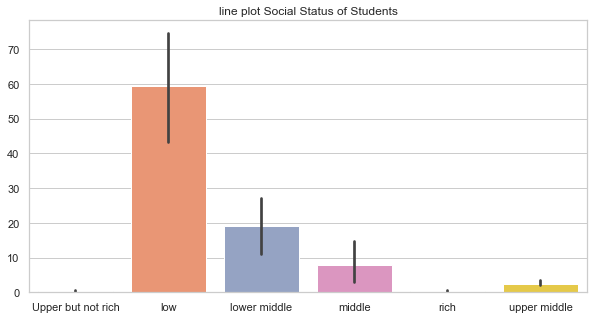

In [142]:
newDEMOinfo = df.iloc[:, [0,1,2,3,4,5,9,49]] #iloc method demo with Gpa

dummy_selectSocSta = pd.get_dummies(df.iloc[:,5])
stat_df = pd.concat([newDEMOinfo, dummy_selectSocSta], axis=1)

pivot_stat_df = pd.pivot_table(
    stat_df, values=["Upper but not rich", "low", "lower middle", "middle", "rich", "upper middle"] , index="course", aggfunc='sum')

sns.barplot(data=pivot_stat_df).set_title("line plot Social Status of Students")

<AxesSubplot:xlabel='socioeconomic_stat', ylabel='GPA'>

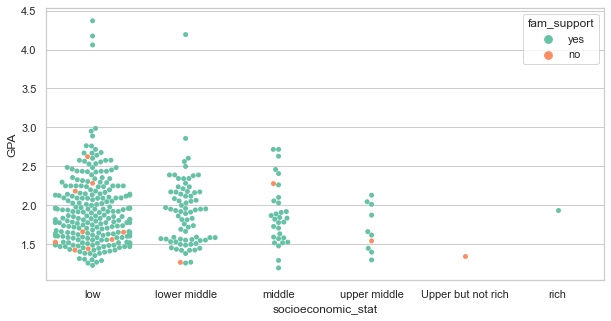

In [143]:
sns.swarmplot(data=df, x="socioeconomic_stat", y="GPA", hue="fam_support")

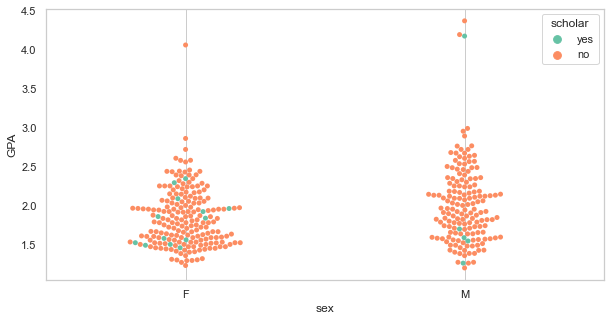

In [144]:
sns.swarmplot(data=df, x="sex", y="GPA", hue="scholar")
plt.grid()

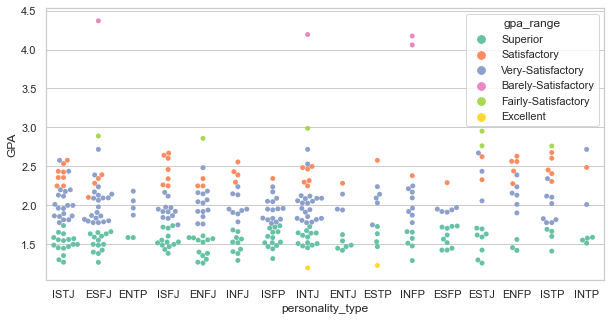

In [145]:
ax = sns.swarmplot(data=df, x="personality_type", y="GPA", hue="gpa_range")

## PLOT TIME MANAGEMENT FOR PERSONALITY TYPE

In [146]:
#create dataframe for demographics
newDEMOinfo = df.iloc[:, [0,1,2,3,4,5,9]]

#create dummy to all tri-features
timeManagement_TM = pd.get_dummies(df.iloc[:,10:17])
classAttendancePartcipation_CAP = pd.get_dummies(df.iloc[:,17:21])

#tri-dataframes
DEMOandTM_DF = pd.concat([newDEMOinfo, timeManagement_TM], axis=1)
DEMOandCAP_DF = pd.concat([newDEMOinfo, classAttendancePartcipation_CAP], axis=1)

In [147]:
#create pivo_tabel for each tri-features for plotting
pivot_tm1_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM1_always", "TM1_sometimes","TM1_never"] , index="personality_type", aggfunc='sum')

pivot_tm2_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM2_always", "TM2_sometimes","TM2_never"] , index="personality_type", aggfunc='sum')

pivot_tm3_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM3_always", "TM3_sometimes","TM3_never"] , index="personality_type", aggfunc='sum')

pivot_tm4_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM4_always", "TM4_sometimes","TM4_never"] , index="personality_type", aggfunc='sum')

pivot_tm5_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM5_always", "TM5_sometimes","TM5_never"] , index="personality_type", aggfunc='sum')

pivot_tm6_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM6_always", "TM6_sometimes","TM6_never"] , index="personality_type", aggfunc='sum')

pivot_tm7_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM7_always", "TM7_sometimes","TM7_never"] , index="personality_type", aggfunc='sum')

Text(0.5, 1.0, 'Statement [TM1] : I have a study schedule with times set aside to study each subject')

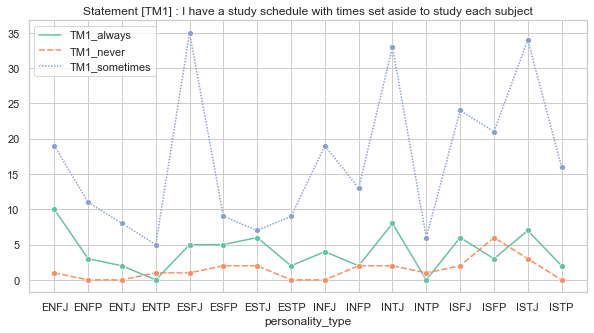

In [148]:
sns.lineplot(data=pivot_tm1_freq,
             marker="o").set_title("Statement [TM1] : I have a study schedule with times set aside to study each subject")

INTERPRETATION:
       
Most dominant personality type that "ALWAYS" scheduled their study time to settle each subjects are ENFJ, INTJ and ISTJ. As opposed to personality type who 'NEVER' clear up a time to study their respective subjects is ISFP. ESFJ, and as well  as, INTJ and ISTJ personality "SOMETIMES" had a time to to settle things. Most of the personality type has answered "SOMETIMES".Hence, students regardless of personality type has a hard time to schedule study time perhaps due to other factors.

Text(0.5, 1.0, 'Statement [TM2] : I use my free time between classes for reading or reviewing')

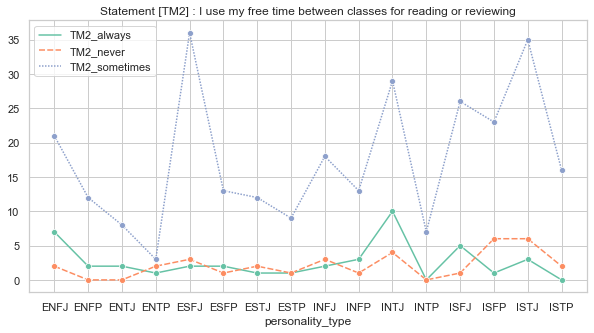

In [149]:
sns.lineplot(data=pivot_tm2_freq,
             marker="o").set_title("Statement [TM2] : I use my free time between classes for reading or reviewing")

 INTERPRETATION: 
      
All personality type are in below average in term of answering "ALWAYS". However, personality types such as ESFJ, INTJ, ISFJ, ISFP and ISTJ. Tends to use their free time for reveiwing and reading. 

Text(0.5, 1.0, 'Statement [TM3] : I balance my study time with recreation and leisure time')

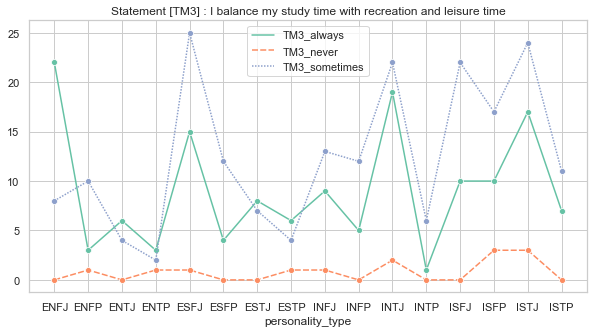

In [150]:
sns.lineplot(data=pivot_tm3_freq,
             marker="o").set_title("Statement [TM3] : I balance my study time with recreation and leisure time")

INTERPRETATION: 

ENFJ personality have a higher tendecy of balacning their academic matter and recreational activity. Additionally, ESFJ students are sometimes inclined to it along with INTJ, ESFJ, ISFJ, ISTJ.

Text(0.5, 1.0, "Statement [TM4] : I have a calendar of the semester and it's marked with the exam dates, project due dates and assignments")

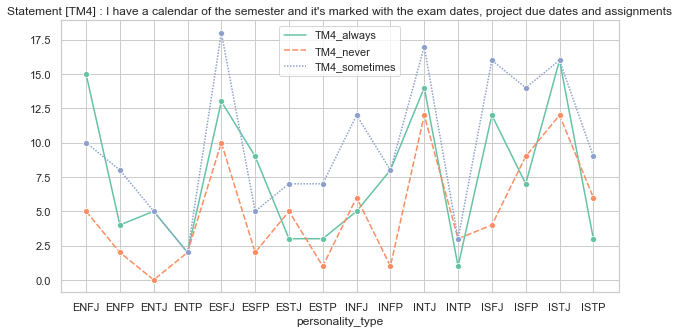

In [151]:
sns.lineplot(data=pivot_tm4_freq, 
             marker="o").set_title("Statement [TM4] : I have a calendar of the semester and it's marked with the exam dates, project due dates and assignments")

INTERPRETATION: 

Most of the personality types settled their calendar dates and marked their academic tasks. however, given the number sample for ENTP they have equal number of frequency that corresponds with the statement. Due to low number of 'always' for INTP it can be ragarded that they dont have the time to mark dates of any types of academic activity.

Text(0.5, 1.0, 'Statement [TM5] : I keep weekly schedule of classes and activities')

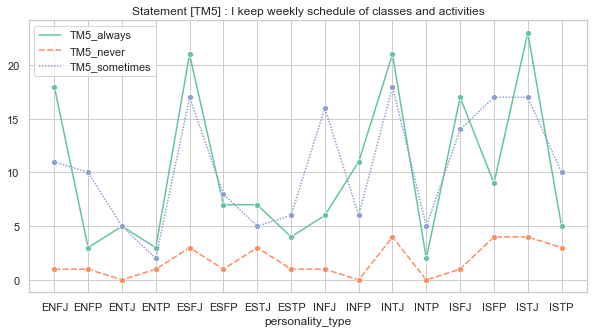

In [152]:
sns.lineplot(data=pivot_tm5_freq,
             marker="o").set_title("Statement [TM5] : I keep weekly schedule of classes and activities")

INTERPRETATION:
        
All personality types are having a weekly schedule to keep track their day-to-day classes and activities. 

Text(0.5, 1.0, 'Statement [TM6] : I use daily to do lists')

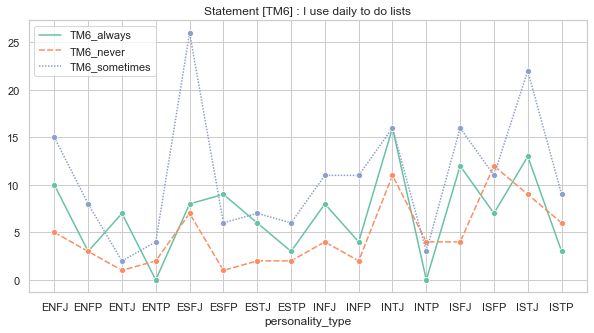

In [153]:
sns.lineplot(data=pivot_tm6_freq,
             marker="o").set_title("Statement [TM6] : I use daily to do lists")

INTERPRETATION:
        
Most of the ISFP personality type's students don't use to do list. On the other hand, majority of ENTJ had a to do list, and among the personality type it is the only type that excedes number in terms of always, regardless of its sample popualtion

Text(0.5, 1.0, 'Statement [TM7] : I study on the weekends')

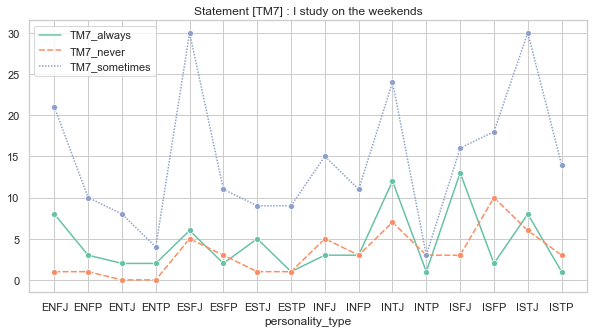

In [154]:
sns.lineplot(data=pivot_tm7_freq, 
             marker="o").set_title("Statement [TM7] : I study on the weekends")

INTERPRETATION
        
Regardless of persoanlity type students 'sometimes' studies on the weekends. ESFP, INFJ, ISFP and ISTP had a most     frequency of 'never' and being raise as the 2nd most number in respect of their population. In contrary, ISFJ type has a great number of always in terms of all types. stating that these type of personality had an effort of studying at the end of the weekends. 

## END OF EDA

# Checking Outliers

[Text(0.5, 1.0, 'Outliers of StudInfo_DF')]

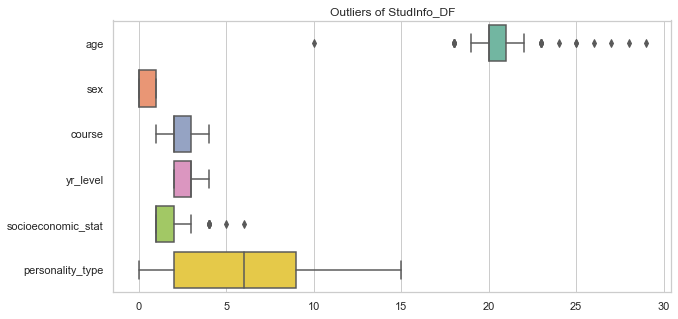

In [155]:
sns.boxplot(data=StudInfo_DF, orient = "h").set(title="Outliers of StudInfo_DF")

[Text(0.5, 1.0, 'Box Plot of Scores')]

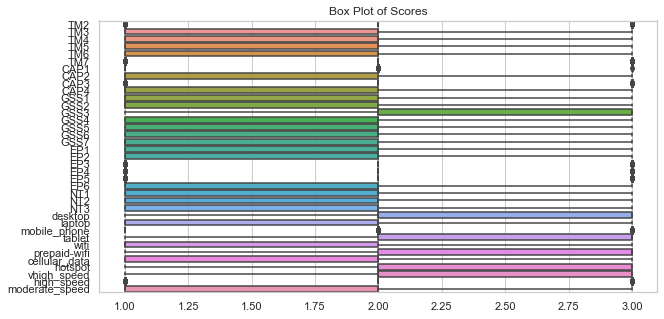

In [156]:
sns.boxplot(data=newDF.iloc[:, 10:47], orient = "h").set(title="Box Plot of Scores")

[Text(0.5, 1.0, 'Box Plot of Scores')]

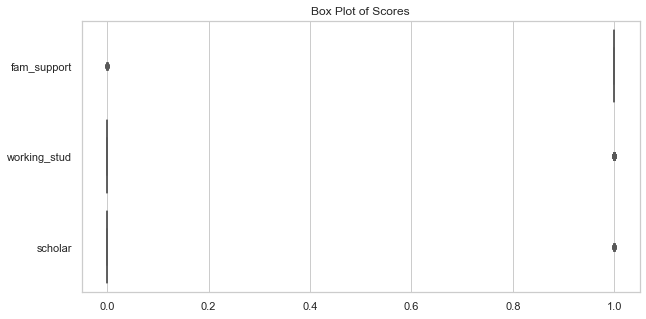

In [157]:
sns.boxplot(data=DiFeatures_DF, orient = "h").set(title="Box Plot of Scores")

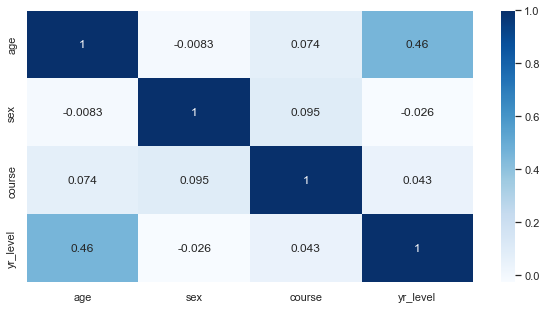

In [158]:
sns.heatmap(newDF[['age', 'sex', 'course', 'yr_level']].corr(), cmap='Blues', annot=True)
plt.show()

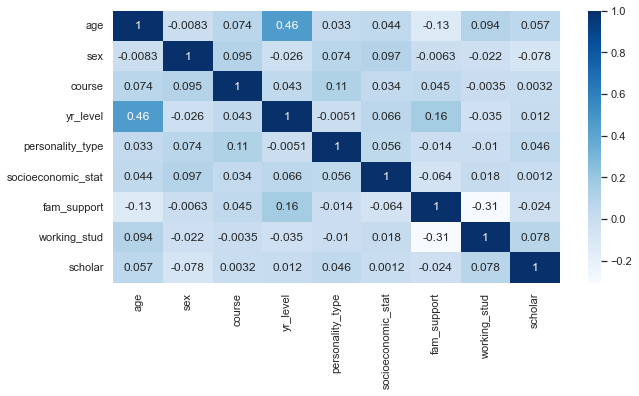

In [159]:
sns.heatmap(newDF[['age', 'sex', 'course', 'yr_level', 'personality_type',
       'socioeconomic_stat', 'fam_support', 'working_stud', 'scholar']].corr(), cmap='Blues', annot=True)
plt.show()

In [160]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 357 non-null    float64
 1   sex                 357 non-null    int32  
 2   course              357 non-null    int32  
 3   yr_level            357 non-null    int64  
 4   socioeconomic_stat  357 non-null    int32  
 5   personality_type    357 non-null    int32  
 6   fam_support         357 non-null    int32  
 7   working_stud        357 non-null    int32  
 8   scholar             357 non-null    int32  
 9   TM1                 357 non-null    int32  
 10  TM2                 357 non-null    int32  
 11  TM3                 357 non-null    int32  
 12  TM4                 357 non-null    int32  
 13  TM5                 357 non-null    int32  
 14  TM6                 357 non-null    int32  
 15  TM7                 357 non-null    int32  
 16  CAP1    

In [161]:
#newDF.drop("student_id", axis=1, inplace=True)

In [162]:
features=newDF.columns[0:-1].values
features

array(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'fam_support', 'working_stud', 'scholar',
       'TM1', 'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2',
       'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6',
       'GSS7', 'EP1', 'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2',
       'NT3', 'desktop', 'laptop', 'mobile_phone', 'tablet', 'wifi',
       'prepaid-wifi', 'cellular_data', 'hotspot', 'vhigh_speed',
       'high_speed', 'moderate_speed', 'light_speed', 'GPA'], dtype=object)

In [163]:
target=newDF.columns[-1:].values
target

array(['gpa_range'], dtype=object)

## Split data to train and test dataset

In [164]:
from sklearn.model_selection import train_test_split
train, test =train_test_split(newDF, test_size=0.2, random_state=42)
train.sample(10)

,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,TM1,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
20,19.0,0,1,2,1,11,1,0,0,3,...,3,3,1,3,3,3,3,1,1.7059,Superior
194,19.0,1,2,2,1,5,1,0,0,1,...,3,3,1,3,2,1,2,2,2.1354,Very-Satisfactory
273,20.0,0,2,3,1,4,1,0,0,1,...,1,2,2,2,1,1,1,1,1.9405,Very-Satisfactory
112,20.0,1,3,2,2,6,1,0,1,2,...,1,3,2,3,1,3,3,3,1.5865,Superior
158,22.0,1,3,4,3,3,1,0,0,2,...,1,2,2,3,1,2,2,2,2.4605,Satisfactory
165,21.0,1,3,4,1,1,1,0,0,3,...,1,2,2,2,2,2,1,2,4.3684,Barely-Satisfactory
103,19.0,1,3,2,2,8,1,0,0,2,...,1,3,1,2,2,1,2,2,1.9519,Very-Satisfactory
259,20.0,0,2,3,1,11,1,0,0,1,...,3,3,1,3,3,3,1,3,1.9524,Very-Satisfactory
70,25.0,0,1,3,1,9,1,0,0,2,...,3,3,1,2,3,3,2,1,2.2404,Very-Satisfactory
50,20.0,0,1,3,2,1,1,0,0,2,...,2,2,1,1,2,2,2,1,2.1731,Very-Satisfactory


In [165]:
newDF["gpa_range"].unique()

array(['Superior', 'Satisfactory', 'Very-Satisfactory',
       'Barely-Satisfactory', 'Fairly-Satisfactory', 'Excellent'],
      dtype=object)

In [166]:
train.head(5)

,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,TM1,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
282,21.0,0,2,4,1,0,1,0,0,2,...,2,3,1,3,2,2,1,2,2.4375,Satisfactory
333,20.0,0,4,3,1,5,1,0,0,2,...,3,3,1,2,3,3,1,3,1.5870,Superior
288,21.0,0,2,4,1,7,1,0,0,3,...,1,3,2,2,2,2,1,2,2.0313,Very-Satisfactory
75,21.0,0,1,4,1,7,1,0,0,2,...,1,2,2,2,2,1,2,2,1.8333,Very-Satisfactory
255,23.0,1,2,3,1,7,1,0,0,2,...,2,2,2,2,2,2,2,2,2.9881,Fairly-Satisfactory


In [167]:
test.head(5)

,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,TM1,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
222,10.0,0,2,2,2,3,1,0,0,3,...,2,3,1,3,3,2,1,1,1.5313,Superior
42,22.0,0,1,3,1,3,1,0,0,2,...,3,2,1,3,2,1,2,3,1.9231,Very-Satisfactory
291,21.0,0,2,4,2,1,1,0,0,2,...,1,2,1,2,2,2,2,2,2.3906,Very-Satisfactory
300,21.0,1,2,4,1,4,1,0,0,2,...,2,2,1,2,2,2,1,1,2.4844,Very-Satisfactory
56,20.0,0,1,3,1,1,1,0,0,2,...,2,2,1,2,2,2,2,2,1.6058,Superior


In [168]:
test.shape

(72, 50)

In [169]:
train.shape

(285, 50)

In [170]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from numpy import mean
from numpy import std
import math
warnings.filterwarnings('ignore')

In [171]:
#load the data in the variables 
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]

In [172]:
X_train

,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,TM1,...,tablet,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA
282,21.0,0,2,4,1,0,1,0,0,2,...,3,2,3,1,3,2,2,1,2,2.4375
333,20.0,0,4,3,1,5,1,0,0,2,...,3,3,3,1,2,3,3,1,3,1.5870
288,21.0,0,2,4,1,7,1,0,0,3,...,3,1,3,2,2,2,2,1,2,2.0313
75,21.0,0,1,4,1,7,1,0,0,2,...,3,1,2,2,2,2,1,2,2,1.8333
255,23.0,1,2,3,1,7,1,0,0,2,...,2,2,2,2,2,2,2,2,2,2.9881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,21.0,0,1,4,1,6,1,0,0,2,...,3,1,2,1,3,2,1,2,2,1.8333
106,23.0,1,3,2,1,3,1,0,0,2,...,2,1,2,1,2,3,1,3,3,1.3846
270,22.0,0,2,3,1,0,1,0,0,2,...,3,1,3,2,2,2,2,2,2,2.0000
348,19.0,0,4,2,1,15,1,0,0,2,...,3,1,3,2,2,2,2,2,2,1.5147


In [173]:
target

array(['gpa_range'], dtype=object)

In [174]:
# Import Classifiers 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
etc = ExtraTreesClassifier()
adc = AdaBoostClassifier()
knc = KNeighborsClassifier()
#gnbc = GaussianNB()
#bnb = BernoulliNB()
mnb = MultinomialNB()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Single-Model Implementation  

RandomForestClassifier() Accuracy Score:  80.55555555555556
DecisionTreeClassifier() Accuracy Score:  94.44444444444444
ExtraTreesClassifier() Accuracy Score:  69.44444444444444
AdaBoostClassifier() Accuracy Score:  79.16666666666666
KNeighborsClassifier() Accuracy Score:  52.77777777777778
MultinomialNB() Accuracy Score:  45.83333333333333


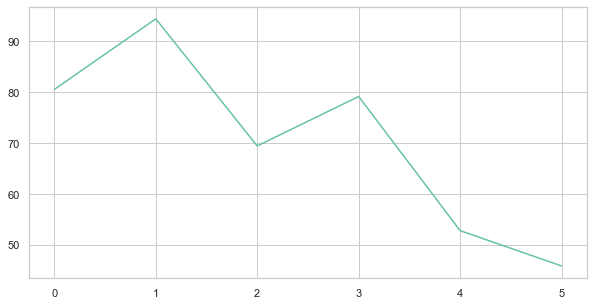

In [175]:
import math
from sklearn.model_selection import cross_val_score
results = []
names = ["rfc", "dtc", "etc", "adc", "knc", "mnb"]
est_single_model = [rfc, dtc, etc, adc, knc, mnb]

for single in est_single_model:
    ypred_single_clf = single.fit(X_train,Y_train).predict(X_test)
    accuracy = accuracy_score(Y_test, ypred_single_clf)*100
    int_acc = math.ceil(accuracy)
    names.append(single)
    results.append(accuracy)
    print("{} Accuracy Score: ".format(single), accuracy)
plt.plot(results)

# BUILD BOOSTING ENSEMBLE CLASSIFIER

In [176]:
#import libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from mlxtend.evaluate import bias_variance_decomp

# [NEW] Boosting Model

In [177]:
#create list of classifiers [NEW]
estimatorsNEW = [("RandomForestClassifier", rfc), 
              ("DecisionTreeClassifier", dtc), 
              ("ExtraTreesClassifier", etc), 
              ("AdaBoostClassifier", adc),
              ("KNeighborsClassifier", knc)]

In [178]:
# Apply GradientBoostingRegressor 
Clf_GradBoost_estNEW = GradientBoostingClassifier(n_estimators=50, max_features=1, max_leaf_nodes=30 ,random_state=42)

clf_boosting_ensembleNEW = StackingClassifier(estimators=estimatorsNEW, final_estimator=Clf_GradBoost_estNEW)
clf_boosting_ensembleNEW.fit(X_train,Y_train)

#PREDICTED Y VALUES FOR BOOSTING ENSEMBLE CLASSIFIERS
clf_boosting_YpredictNEW = clf_boosting_ensembleNEW.predict(X_test)

clf_score = accuracy_score(Y_test, clf_boosting_YpredictNEW)S
print("ACCURACY SCORE: [ {:00%} ]".format(clf_score))

ACCURACY SCORE: [ 90.277778% ]


In [179]:
print(classification_report(Y_test, clf_boosting_YpredictNEW))

                     precision    recall  f1-score   support

Barely-Satisfactory       1.00      1.00      1.00         1
Fairly-Satisfactory       0.00      0.00      0.00         1
       Satisfactory       0.79      0.79      0.79        14
           Superior       1.00      1.00      1.00        29
  Very-Satisfactory       0.86      0.89      0.87        27

           accuracy                           0.90        72
          macro avg       0.73      0.73      0.73        72
       weighted avg       0.89      0.90      0.90        72



In [180]:
print(" precision_score {:%}".format(precision_score(Y_test, clf_boosting_YpredictNEW, average="macro" )))

 precision_score 72.857143%


In [181]:
multilabel_confusion_matrix(Y_test, clf_boosting_YpredictNEW)

array([[[71,  0],
        [ 0,  1]],

       [[71,  0],
        [ 1,  0]],

       [[55,  3],
        [ 3, 11]],

       [[43,  0],
        [ 0, 29]],

       [[41,  4],
        [ 3, 24]]], dtype=int64)

# [OLD] Boosting Model

In [182]:
#create list of classifiers [OLD]
#rf, dt, svr, knn, ada
estimatorsOLD = [("RandomForestClassifier", rfc), 
                 ("DecisionTreeClassifier", dtc), 
                 ("MultinomialNB", mnb), 
                 ("ExtraTreesClassifier", etc),
                 ("AdaBoostClassifier", adc)]

In [183]:
# Apply GradientBoostingRegressor 
Clf_GradBoost_estOLD = GradientBoostingClassifier(n_estimators=50, max_features=1, max_leaf_nodes=30 ,random_state=42)

clf_boosting_ensembleOLD = StackingClassifier(estimators=estimatorsOLD, final_estimator=Clf_GradBoost_estOLD)
clf_boosting_ensembleOLD.fit(X_train,Y_train)

#PREDICTED Y VALUES FOR BOOSTING ENSEMBLE CLASSIFIERS
clf_boosting_YpredictOLD = clf_boosting_ensembleOLD.predict(X_test)
clf_score = accuracy_score(Y_test, clf_boosting_YpredictOLD)
print("ACCURACY SCORE: [ {:00%} ]".format(clf_score))

ACCURACY SCORE: [ 87.500000% ]


In [184]:
print(classification_report(Y_test, clf_boosting_YpredictOLD))

                     precision    recall  f1-score   support

Barely-Satisfactory       1.00      1.00      1.00         1
Fairly-Satisfactory       0.00      0.00      0.00         1
       Satisfactory       0.75      0.64      0.69        14
           Superior       1.00      1.00      1.00        29
  Very-Satisfactory       0.83      0.89      0.86        27

           accuracy                           0.88        72
          macro avg       0.72      0.71      0.71        72
       weighted avg       0.87      0.88      0.87        72



# BUILD BAGGING ENSEMBLE CLASSIFIER

# [NEW] Bagging Model

In [185]:
#Use fit method for all algorithms to be store inside the list. 
rfc_fit = rfc.fit(X_train, Y_train)
dtc_fit = dtc.fit(X_train, Y_train)
etc_fit = etc.fit(X_train, Y_train)
adc_fit = adc.fit(X_train, Y_train)
knc_fit = knc.fit(X_train, Y_train)
mnb_fit = mnb.fit(X_train, Y_train)


estimatorsNEW_fitted = [rfc_fit, dtc_fit, etc_fit, knc_fit, adc_fit] #create list for 'new' ensemble model
estimatorsOLD_fitted = [rfc_fit, dtc_fit, adc_fit, knc_fit, mnb_fit ] #create list for 'old' ensemble model

In [186]:
for clf in estimatorsNEW_fitted:
    clf_regNEW = BaggingClassifier(base_estimator=clf, random_state=42)
    ypred_clfNEW = clf.predict(X_test) # PREDICT CURRENT CLASSIFIER
    list_estimatorNEW = []
    list_estimatorNEW.append(("clf",clf_regNEW))
    print("[{}] accuracy_score : ".format(clf), accuracy_score(Y_test, ypred_clfNEW))
    
    # create the ensemble model
    clf_bagging_ensembleNEW = VotingClassifier(list_estimatorNEW)
    clf_bagging_ensembleNEW.fit(X_train, Y_train)
    ypred_clf_bagging_ensembleNEW = clf_bagging_ensembleNEW.predict(X_test)
    
print("\nEnsemble Model Classifier : {:0%}".format(accuracy_score(Y_test, ypred_clf_bagging_ensembleNEW)))
print(classification_report(Y_test, ypred_clf_bagging_ensembleNEW))

[RandomForestClassifier()] accuracy_score :  0.7638888888888888
[DecisionTreeClassifier()] accuracy_score :  0.9305555555555556
[ExtraTreesClassifier()] accuracy_score :  0.6527777777777778
[KNeighborsClassifier()] accuracy_score :  0.5277777777777778
[AdaBoostClassifier()] accuracy_score :  0.7916666666666666

Ensemble Model Classifier : 80.555556%
                     precision    recall  f1-score   support

Barely-Satisfactory       1.00      1.00      1.00         1
Fairly-Satisfactory       1.00      1.00      1.00         1
       Satisfactory       0.00      0.00      0.00        14
           Superior       1.00      1.00      1.00        29
  Very-Satisfactory       0.66      1.00      0.79        27

           accuracy                           0.81        72
          macro avg       0.73      0.80      0.76        72
       weighted avg       0.68      0.81      0.73        72



In [187]:
#predict using [new] bagging model
prediction_EnsemModelBaggingNEW = clf_bagging_ensembleNEW.predict(X_test)
prediction_EnsemModelBaggingNEW

array(['Superior', 'Very-Satisfactory', 'Very-Satisfactory',
       'Very-Satisfactory', 'Superior', 'Superior', 'Superior',
       'Very-Satisfactory', 'Very-Satisfactory', 'Superior',
       'Very-Satisfactory', 'Superior', 'Superior', 'Very-Satisfactory',
       'Very-Satisfactory', 'Very-Satisfactory', 'Very-Satisfactory',
       'Very-Satisfactory', 'Superior', 'Superior', 'Very-Satisfactory',
       'Superior', 'Very-Satisfactory', 'Very-Satisfactory',
       'Very-Satisfactory', 'Superior', 'Very-Satisfactory', 'Superior',
       'Very-Satisfactory', 'Superior', 'Very-Satisfactory', 'Superior',
       'Superior', 'Superior', 'Very-Satisfactory', 'Very-Satisfactory',
       'Superior', 'Superior', 'Superior', 'Barely-Satisfactory',
       'Very-Satisfactory', 'Very-Satisfactory', 'Very-Satisfactory',
       'Superior', 'Very-Satisfactory', 'Superior', 'Very-Satisfactory',
       'Very-Satisfactory', 'Very-Satisfactory', 'Superior',
       'Very-Satisfactory', 'Very-Satisfactory',

<AxesSubplot:>

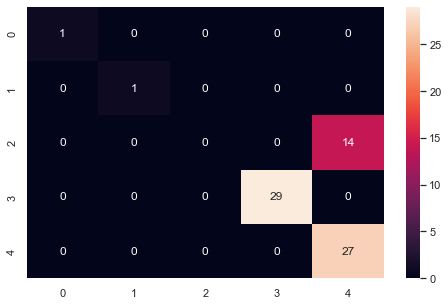

In [188]:
cm = confusion_matrix(Y_test, prediction_EnsemModelBaggingNEW)
fig = plt.figure(figsize=(8, 5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')

# [OLD] Bagging Model

In [189]:
for clf in estimatorsOLD_fitted:
    clf_regOLD = BaggingClassifier(base_estimator=clf, random_state=42)
    ypred_clfOLD = clf.predict(X_test) # PREDICT CURRENT CLASSIFIER
    lst_estimatorOLD = []
    lst_estimatorOLD.append(("clf", clf_regOLD))
    print("[{}] accuracy_score : ".format(clf), accuracy_score(Y_test, ypred_clfOLD))
    
    # create the ensemble model
    clf_bagging_ensembleOLD = VotingClassifier(lst_estimatorOLD)
    clf_bagging_ensembleOLD.fit(X_train, Y_train)
    ypred_clf_bagging_ensembleOLD = clf_bagging_ensembleOLD.predict(X_test)
    
print("\nEnsemble Model Classifier : [{:%}]".format(accuracy_score(Y_test, ypred_clf_bagging_ensembleOLD)))
print(classification_report(Y_test, ypred_clf_bagging_ensembleOLD))

[RandomForestClassifier()] accuracy_score :  0.7638888888888888
[DecisionTreeClassifier()] accuracy_score :  0.9305555555555556
[AdaBoostClassifier()] accuracy_score :  0.7916666666666666
[KNeighborsClassifier()] accuracy_score :  0.5277777777777778
[MultinomialNB()] accuracy_score :  0.4583333333333333

Ensemble Model Classifier : [48.611111%]
                     precision    recall  f1-score   support

Barely-Satisfactory       0.00      0.00      0.00         1
Fairly-Satisfactory       0.00      0.00      0.00         1
       Satisfactory       0.00      0.00      0.00        14
           Superior       0.56      0.48      0.52        29
  Very-Satisfactory       0.45      0.78      0.57        27

           accuracy                           0.49        72
          macro avg       0.20      0.25      0.22        72
       weighted avg       0.39      0.49      0.42        72



In [190]:
#from yellowbrick.classifier import PrecisionRecallCurve
#from yellowbrick.classifier import ClassPredictionError
#from yellowbrick.target import FeatureCorrelation

## Deploy trained model

In [191]:
import pickle

In [192]:
pickle.dump(clf_boosting_ensembleNEW, open('boost_final_model.pkl','wb'))

In [193]:
test_model = pickle.load(open('boost_final_model.pkl','rb'))

In [194]:
new_Xdata = X_test.sample(10)
new_Ydata = Y_test['gpa_range'].loc[new_Xdata.index.values]
print(new_Xdata)

      age  sex  course  yr_level  socioeconomic_stat  personality_type  \
126  22.0    1       3         3                   1                14   
30   20.0    0       1         3                   2                 7   
222  10.0    0       2         2                   2                 3   
322  21.0    0       4         3                   1                 4   
182  21.0    1       3         4                   1                 7   
220  22.0    0       2         2                   3                 4   
73   22.0    0       1         4                   2                14   
292  21.0    1       2         4                   2                13   
229  19.0    1       2         2                   3                10   
56   20.0    0       1         3                   1                 1   

     fam_support  working_stud  scholar  TM1  ...  tablet  wifi  prepaid-wifi  \
126            1             0        0    2  ...       3     1             3   
30             1       

In [195]:
new_Xdata.columns

Index(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'fam_support', 'working_stud', 'scholar', 'TM1',
       'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2', 'CAP3',
       'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6', 'GSS7', 'EP1',
       'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2', 'NT3', 'desktop',
       'laptop', 'mobile_phone', 'tablet', 'wifi', 'prepaid-wifi',
       'cellular_data', 'hotspot', 'vhigh_speed', 'high_speed',
       'moderate_speed', 'light_speed', 'GPA'],
      dtype='object')

In [196]:
new_Ydata

126         Satisfactory
30     Very-Satisfactory
222             Superior
322             Superior
182    Very-Satisfactory
220             Superior
73              Superior
292    Very-Satisfactory
229             Superior
56              Superior
Name: gpa_range, dtype: object

In [197]:
#predictions by the model
pred = test_model.predict(new_Xdata)
print(pred)

['Satisfactory' 'Very-Satisfactory' 'Superior' 'Superior'
 'Very-Satisfactory' 'Superior' 'Superior' 'Satisfactory' 'Superior'
 'Superior']


In [198]:
print(new_Ydata.values)

['Satisfactory' 'Very-Satisfactory' 'Superior' 'Superior'
 'Very-Satisfactory' 'Superior' 'Superior' 'Very-Satisfactory' 'Superior'
 'Superior']


In [199]:
#checking for the accuracy score using confusion matrix
res_cm = confusion_matrix (new_Ydata, pred)
print('Confusion Matrix:\n', res_cm)
res_acc = accuracy_score(new_Ydata, pred)
print('Accuracy Score:\n', res_acc)

Confusion Matrix:
 [[1 0 0]
 [0 6 0]
 [1 0 2]]
Accuracy Score:
 0.9


In [200]:
print(classification_report(new_Ydata, pred))

                   precision    recall  f1-score   support

     Satisfactory       0.50      1.00      0.67         1
         Superior       1.00      1.00      1.00         6
Very-Satisfactory       1.00      0.67      0.80         3

         accuracy                           0.90        10
        macro avg       0.83      0.89      0.82        10
     weighted avg       0.95      0.90      0.91        10

